# Random Forest Regressor

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# ?? RandomForestRegressor

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

In [3]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))

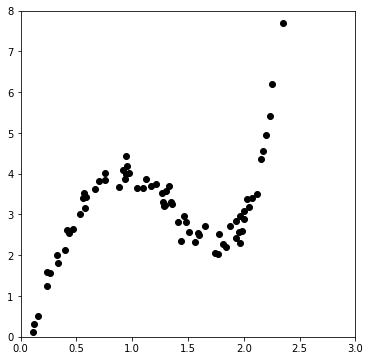

In [5]:
x_plot = np.vstack(np.linspace(0, 10, 100))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.show()

# Wyznacz optymalne parametry

In [6]:
x=np.vstack(x)
param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2, 10, 20, 100]
}
rfc = RandomForestRegressor(n_jobs=-1, max_features= 'sqrt' ,n_estimators=50, oob_score = True) 


CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(x,y)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=50, n_jobs=-1,
                                             oob_score=True, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=N

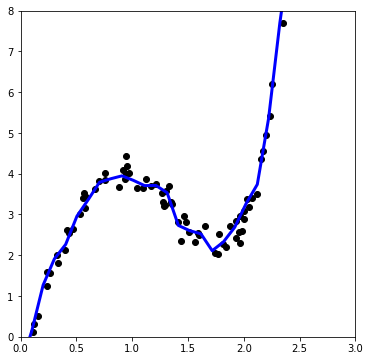

In [7]:
x_plot = np.vstack(np.linspace(0, 10, 100))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, CV_rfc.predict(x_plot), color='blue',linewidth=3)
plt.show()

In [5]:
import pandas as pd
df_adv = pd.read_csv('Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
import pandas as pd
df_adv = pd.read_csv('Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
seed=123
kfold = model_selection.KFold(n_splits=5, random_state=seed)

param_grid = {
    'n_estimators': [100, 200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
}
rfc = RandomForestRegressor(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True ) 
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= kfold, refit=True)
CV_rfc.fit(X,y)
CV_rfc.best_params_

from sklearn import  metrics
print(metrics.r2_score(y, CV_rfc.best_estimator_.predict(X)))


C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9974891125302096


0.9974900334830956
['TV', 'radio', 'newspaper']
[0, 1, 2]
[0.63475178 0.35769187 0.00755635]


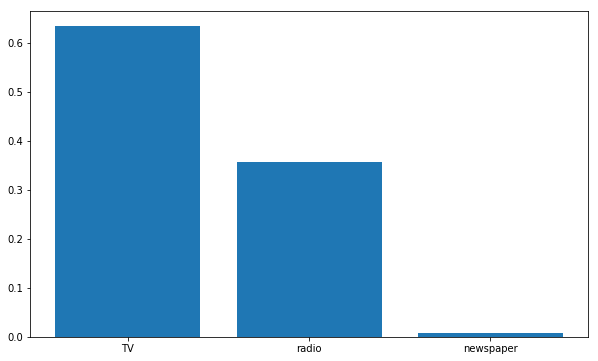

In [8]:

# plot importance scores
names = ['TV', 'radio','newspaper']
print(names)
ticks = [i for i in range(len(names))]
print(ticks)
print(CV_rfc.best_estimator_.feature_importances_)
plt.figure(figsize=(10,6));
plt.bar(ticks, CV_rfc.best_estimator_.feature_importances_)
plt.xticks(ticks, names)
plt.show()

In [9]:
from sklearn import  metrics
print(metrics.r2_score(y, CV_rfc.best_estimator_.predict(X)))

0.9974900334830956


['TV', 'radio', 'newspaper']
[0, 1, 2]
[0.63446883 0.35884705 0.00668413]


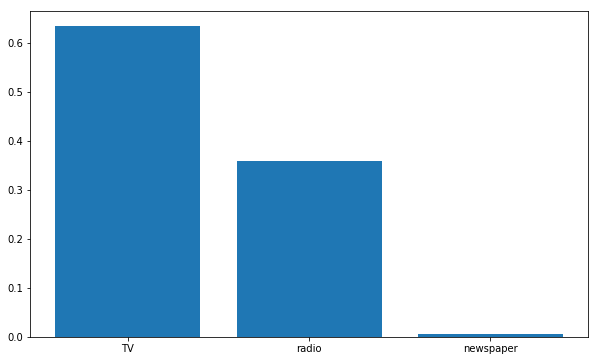

In [31]:
# plot importance scores
names = ['TV', 'radio','newspaper']
print(names)
ticks = [i for i in range(len(names))]
print(ticks)
print(CV_rfc.best_estimator_.feature_importances_)
plt.figure(figsize=(10,6));
plt.bar(ticks, CV_rfc.best_estimator_.feature_importances_)
plt.xticks(ticks, names)
plt.show()

In [29]:
CV_rfc.best_estimator_.feature_importances_

array([0.63446883, 0.35884705, 0.00668413])